#제목
##중간제목
이 것은 숙제 1번을 위한 테스트 입니다.  
엔터는 뒤에 스페이스를 두번 넣어주세요.  
  
이건 아이템입니다.
- item  

나는 수학을 다음과 같이 달러 두개로 씁니다
$$ \sum n = n(n+1)\div2 $$


엔터 두번은 단락이 바뀝니다.  
좋은 밤이군요~

In [51]:
import numpy as np
import random as rd


m = 1000
lower = -500
upper = 500
sigma = 100

np.random.seed(seed=9832)
perturbations = np.random.normal(0, sigma, size=m)
train_set = []
a = 10
b = 7

for x in range(m):
    t = rd.uniform(lower,upper)
    train_set.append([t,a*t+b])
# print(len(train_set))

train_set = np.array(train_set, dtype=np.float32)
# print(train_set)
train_set[:,1] = train_set[:,1] + perturbations
print(train_set)
# print(perturbations)


[[   39.66862   372.03088]
 [ -418.76025 -4060.4207 ]
 [ -170.08942 -1683.057  ]
 ...
 [ -307.69443 -3062.421  ]
 [  456.0782   4529.5923 ]
 [ -236.58986 -2457.7366 ]]


유니폼 분포를 사용하여 -500과 500사이의 값을 가져온 뒤에 지정된 선형 함수에 넣습니다.
$$\hat{y} = 10x+7 + X \texttt{~} N(0,1)$$
실수형 numpy array를 만든 후에 정규분포를 띄는 분포에서 가져온 데이터를 y 부분에 넣어주도록 합니다.

# Input data


1. a straight line that is the graph of a linear function (in blue color)
2. a set of points that have random perturbations with respect to the straight line (in black color)

[[   39.66862   372.03088]
 [ -418.76025 -4060.4207 ]
 [ -170.08942 -1683.057  ]
 ...
 [ -307.69443 -3062.421  ]
 [  456.0782   4529.5923 ]
 [ -236.58986 -2457.7366 ]]


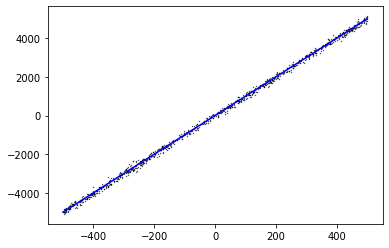

In [52]:
print(train_set)
plt.scatter(train_set[:,0],train_set[:,1], c="black", s=0.1)
plt.plot([lower,upper],[a*lower+b,a*upper+b],'b-')
plt.show()


# Linear regression
모델은 다음과 같다.
$$ h_θ​(x)=θ_0​+θ_1​x $$
cost는 다음과 같다.
$$ J(θ)=\frac{1}{2m}\sum_{i=1}^{m}​(h_θ​(x^{(i)})−y^{(i)})^{2} $$

적당히 [-100,100]에서 무작위로 $$ θ_0​, θ_1$$ 을 고른다.  


함수 h(th0, th1, x)를 정의하여 편의를 위해 사용한다.  
J 함수로 오차를 일단 생각해본다.  
역시 오차가 이상하므로 GD를 시작한다.

$$ θ_0(t+1)​ := θ_0(t)​−α​\frac{1}{m}\sum_{i=1}^{m}​(h_θ​(x^{(i)})−y^{(i)}) $$
$$ θ_1(t+1) := θ_1(t)−α\frac{1}{m}\sum_{i=1}^{m}(h_θ(x^{(i)})−y^{(i)})x^{(i)}$$

이것을 바탕으로 다음 θ를 정해봅니다.

In [63]:
g_th0 = rd.uniform(-100,100)
g_th1 = rd.uniform(-100,100)
alpha = 0.01

# 0.025는 inf 로 cost가 발산한다.
# 0.0025는 너무 느리게 학습된다.


def h(th0, th1, x):
    return th0 + th1*x

def J(th0, th1):
    sum = 0
    for i in range(m):
        # train_set[i,0] ith row, x-axis
        sum = sum + (h(th0, th1, train_set[i,0]) - train_set[i,1]) ** 2
    return (1/(2*m)) * sum

def th0_cal(th0, th1):
    sum = 0
    for i in range(m):
        sum = sum + (h(th0, th1, train_set[i,0]) - train_set[i,1])
    return (1/m) * sum

def th1_cal(th0, th1):
    sum = 0
    for i in range(m):
        sum = sum + ((h(th0, th1, train_set[i,0]) - train_set[i,1]) * train_set[i,0])
    return (1/m) * sum

J_log = [J(g_th0, g_th1)]
th0_log = [g_th0]
th1_log = [g_th1]
e = 0.01

while True:
    
    temp0 = g_th0-alpha*(1/m)* th0_cal(g_th0, g_th1)
    temp1 = g_th1-alpha*(1/m)* th1_cal(g_th0, g_th1)
    g_th0 = temp0
    g_th1 = temp1
    J_log.append(J(g_th0, g_th1))
    th0_log.append(g_th0)
    th1_log.append(g_th1)
    if abs(g_th0 - th0_log[-2]) <= e and abs(g_th1 - th1_log[-2]) <= e and abs(J(g_th0, g_th1) - J_log[-2]) <=e:
        break
    print("g_th0 : ", g_th0, "g_th1 : ", g_th1, "cost : ", J(g_th0, g_th1))





스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
g_th0 :  -25.68307186794655 g_th1 :  10.009929573794667 cost :  5658.676650474825
g_th0 :  -25.68273943920239 g_th1 :  10.009929595292219 cost :  5658.665599643025
g_th0 :  -25.682407013781287 g_th1 :  10.009929616789556 cost :  5658.654549032147
g_th0 :  -25.6820745916832 g_th1 :  10.009929638286678 cost :  5658.6434986422055
g_th0 :  -25.681742172908102 g_th1 :  10.009929659783586 cost :  5658.632448473194
g_th0 :  -25.681409757455956 g_th1 :  10.00992968128028 cost :  5658.62139852509
g_th0 :  -25.681077345326727 g_th1 :  10.009929702776757 cost :  5658.610348797903
g_th0 :  -25.680744936520387 g_th1 :  10.00992972427302 cost :  5658.599299291643
g_th0 :  -25.6804125310369 g_th1 :  10.00992974576907 cost :  5658.588250006271
g_th0 :  -25.68008012887623 g_th1 :  10.009929767264902 cost :  5658.577200941808
g_th0 :  -25.67974773003835 g_th1 :  10.00992978876052 cost :  5658.566152098243
g_th0 :  -25.679415334523224 g_th1 :  10.009929810255924 cost :

# Output results [2pt]


1. the set of points that have random perturbations with respect to the straight line (in black color)
2. a straight line that is the graph of a solution obtained by linear regression (in red color)

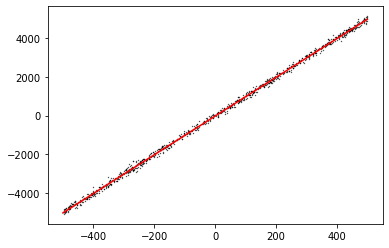

In [66]:
plt.scatter(train_set[:,0],train_set[:,1], c="black", s=0.1)
plt.plot([lower,upper],[g_th1*lower+g_th0,g_th1*upper+g_th0],'r-')
plt.show()

# Plotting the energy values [3pt]


1. the value of the objective function at every optimization step by the gradient descent algorithm (in blue color)
2. the optimization should be performed until convergence

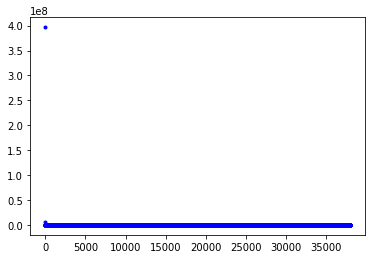

In [67]:
plt.plot(J_log,'b.')
plt.show()

# Plotting the model parameters [3pt]


1. the value of the model parameters $$\theta_0 and \theta_1$$​ at every optimization step (in red θ_0 and blue θ_1​ colors)
2. the optimization should be performed until convergence